In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.utils import partition
import re

# 데이터 가져오기

In [2]:
train=pd.read_csv('data/train.hate.csv')

In [3]:
test=pd.read_csv('data/test.hate.no_label.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  7896 non-null   object
 1   label     7896 non-null   object
dtypes: object(2)
memory usage: 123.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  974 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [6]:
test.iloc[136]

comments    뒤늦게 휘성 잘나가는 게 배아팠나? 잘사는애를 왜??
Name: 136, dtype: object

In [7]:
total=pd.concat([train,test])  #7896:

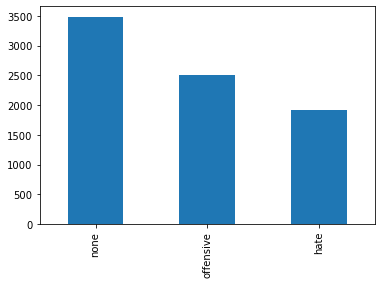

In [8]:
total['label'].value_counts()
total['label'].value_counts().plot(kind='bar')

In [9]:
total['label_band']=total['label'].map({'none':0,'offensive':1,'hate':2})

In [10]:
train.head()

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate


# 데이터 전처리

In [11]:
wordDict={"[\W+]":" ",'[\d+]':' ','[ㅡ+]':'','[ㅠ+]':'','[ㅜ+]':'','[ㄱ-ㅎ]':'','ᆢᆢ':''}

In [12]:
for i,j in wordDict.items():
    total['comments']=total.comments.str.replace(i,j)

In [13]:
def cw(x):
    simdict={'추카':'축하'}
    for index,word in simdict.items():
        return re.sub(index,word,x)

In [14]:
total['comments']=total.comments.apply(cw)

### 문자=> 숫자 (단어 길이와 빈도수를 조절)

In [15]:
n=2  #단어 길이
m=3  # 빈도수

In [16]:
okt=Okt()
wordList=[]
word_index={}
wordCount={}
total['corpus']=0
for index ,sentencs in enumerate(total.comments):
    words=okt.morphs(sentencs,norm=True,stem=True)
    total['corpus'].iloc[index]=words
    for word in words:
        if len(word) >= n:
            if word not in wordList:
                wordCount[word]=1
                wordList.append(word)
            else:
                wordCount[word]=wordCount[word]+1
wordList=[]                
for words in total['corpus']:
    for word in words:
        if len(word) >=n:
            if wordCount[word] >= m:
                if word not in wordList:
                    word_index[word]=len(wordList)
                    wordList.append(word)

C:\Users\i\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
total

,comments,label,label_band,corpus
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate,2.0,"[현재, 호텔, 주인, 심정, 아, 난, 마른하늘, 에, 날벼락, 맞다, 호텔, 망..."
1,한국적인 미인의 대표적인 분 너무나 곱고아름다운모습 그모습뒤의 슬픔을...,none,0.0,"[한국, 적, 인, 미인, 의, 대표, 적, 인, 분, 너무나, 곱, 고, 아름답다..."
2,못된 넘들 남의 고통을 즐겼던 넘들 이젠 마땅한 처벌을 받아야지 그래...,hate,2.0,"[못, 되다, 넘다, 들다, 남, 의, 고통, 을, 즐기다, 넘다, 들다, 이, 젠..."
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,none,0.0,"[화, 어설프다, 화, 지나다, 갈수록, 너무, 재밌다]"
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각...,hate,2.0,"[사람, 얼굴, 손톱, 으로, 긁다, 인격, 살해, 이고, 동영상, 이, 몰카, 냐..."
...,...,...,...,...
969,대박 게스트 꼭 봐야징 컨셉이 바뀌니깐 재미지넹,NaN,NaN,"[대박, 게스트, 꼭, 보다, 컨셉, 이, 바뀌다, 재미, 지, 넹]"
970,성형으로 다 뜯어고쳐놓고 예쁜척 성형 전 니 얼굴 다 알고있다 순자처럼 된장냄새...,NaN,NaN,"[성형, 으로, 다, 뜯다, 고치다, 예쁘다, 척, 성형, 전, 니, 얼굴, 다, ..."
971,분위기는 비슷하다만 전혀다른 전개던데 무슨 우리나라사람들은 분위기만 비슷하면 다 표...,NaN,NaN,"[분위기, 는, 비슷하다, 전혀, 다른, 전개, 던데, 무슨, 우리나라, 사람, 들..."
972,입에 손가릭이 개 있으니 징그럽다,NaN,NaN,"[입, 에, 손가릭, 이, 개, 있다, 징그럽다]"


In [18]:
print(sorted(word_index.keys()))

['BTS', 'JTBC', 'KBS', 'OOO', 'SM', 'SNS', 'TV', 'YG', 'aoa', 'bj', 'bts', 'bye', 'cf', 'com', 'god', 'https', 'jk', 'jyp', 'kbs', 'kg', 'mbc', 'mc', 'pd', 'sbs', 'sm', 'sns', 'to', 'tv', 'vs', 'xx', 'yg', '가가', '가게', '가격', '가관', '가기', '가깝다', '가꾸다', '가끔', '가나', '가난하다', '가늘다', '가능성', '가능하다', '가다', '가도', '가득', '가득하다', '가든', '가라', '가로세로', '가루', '가르다', '가르치다', '가리다', '가만', '가만있다', '가만히', '가면', '가버리다', '가볍다', '가보', '가보다', '가사', '가세', '가수', '가스', '가슴', '가시다', '가식', '가야', '가왜', '가요', '가요무대', '가운데', '가장', '가정', '가정사', '가져오다', '가족', '가즈', '가지', '가지가지', '가지다', '가짜', '가치', '가치관', '가하다', '가해자', '각자', '간다', '간만', '간이', '간지', '갈구다', '갈다', '갈라', '갈리다', '갈수', '갈수록', '갈아', '감다', '감당', '감독', '감동', '감방', '감사하다', '감성', '감싸다', '감옥', '감정', '감정이입', '감추다', '감탄', '감흥', '감히', '갑자기', '강간', '강남', '강동구', '강동원', '강성훈', '강소라', '강아지', '강요', '강용석', '강은비', '강제', '강조', '강지환', '강타', '강하늘', '강하다', '강한나', '강호동', '갖다', '갖추다', '같다', '같이', '같잖다', '갚다', '개국', '개그', '개그맨', '개그우먼', '개극혐', '개꿀잼', '개념', '개다', '개돼지', '개론', '개리', '개

### Document Term Matrix

In [19]:
totalarray=[]
for corpus in total.corpus:
    temp=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp[word_index[word]]=+1
    totalarray.append(temp)

In [20]:
dtm=pd.DataFrame(totalarray,columns=word_index.keys())

In [21]:
dtm.shape

(8870, 4134)

### one hot encoding

In [22]:
totalarray=[]
for corpus in total.corpus:
    temp=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp[word_index[word]]=1
    totalarray.append(temp)

In [23]:
ohe=pd.DataFrame(totalarray,columns=word_index.keys())

In [24]:
ohe.shape

(8870, 4134)

In [25]:
xTrain=ohe.iloc[:7896].values
xTest=ohe.iloc[7896:].values
yTrain=total['label_band'].iloc[:7896].values

In [26]:
print(type(xTrain))
print(type(xTest))
print(type(yTrain))
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7896, 4134)
(974, 4134)
(7896,)


In [27]:
from sklearn.naive_bayes import CategoricalNB

In [28]:
model=CategoricalNB()
model.fit(xTrain, yTrain)

CategoricalNB()

In [42]:
model.predict(xTest[135:136])

array([0.])

In [60]:
model.predict(xTest[800:])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [44]:
pred

NameError: name 'pred' is not defined

In [33]:
xTest[135:136]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
xTest[136:137]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
np.unique(xTest[136:137])

array([0, 1], dtype=int64)

In [36]:
np.unique(xTest[135:136])

array([0, 1], dtype=int64)

In [37]:
xTest[135:136].shape

(1, 4134)

In [38]:
xTest[136:137].shape

(1, 4134)